<a href="https://colab.research.google.com/github/Felipe062220025/N2_BI_ELETIVA2_MOVIES/blob/main/N2_Felipe062220025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a rel="license" href="https://faculdadesalvadorarena.org.br/"><img alt="FESA" style="border-width:0" src="https://faculdadesalvadorarena.org.br/wp-content/uploads/2022/07/logo_fesa.png" /></a><br />
**FESA - Eletiva II (2025.1)** <br/>

Aluno(a): Felipe Marques Lourenço Rodrigues <br/>
Data:
04/04/2025 <br/>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
movie_ratings = ratings_df.groupby("movieId")["rating"].mean().reset_index()
movie_ratings.columns = ["movieId", "average_rating"]
movies_with_ratings = pd.merge(movies_df, movie_ratings, on="movieId")


In [ ]:
movies_df = pd.read_csv("movies.csv")
ratings_df = pd.read_csv("ratings.csv")

In [ ]:
movies_df["year"] = movies_df["title"].str.extract(r"\((\d{4})\)").astype(float)
movies_df["genres_list"] = movies_df["genres"].str.split("|")
movies_df["title_clean"] = movies_df["title"].str.replace(r"\s\(\d{4}\)", "", regex=True)


In [ ]:

ratings_df["timestamp"] = pd.to_datetime(ratings_df["timestamp"], unit='s')
ratings_df["year"] = ratings_df["timestamp"].dt.year

movies_exploded = movies_df.explode("genres_list")

QUESTÃO 1

Respostas:

(a) A correlação entre o ano do filme e a média das notas foi baixa. Isso mostra que o ano de lançamento não influencia muito na nota que o filme recebe.

(b) A variação das notas dadas pelos usuários é maior do que a variação entre os gêneros. Ou seja, os usuários têm gostos bem diferentes, enquanto os gêneros seguem um padrão mais comum.

(c) O gênero mais comum nos filmes é Drama, seguido de Comedy e Action.

(d) O número de avaliações cresceu bastante a partir dos anos 2000, o que pode estar ligado ao aumento do uso da internet e de plataformas de filmes.


(1a) Correlação entre ano e avaliação média: -0.11


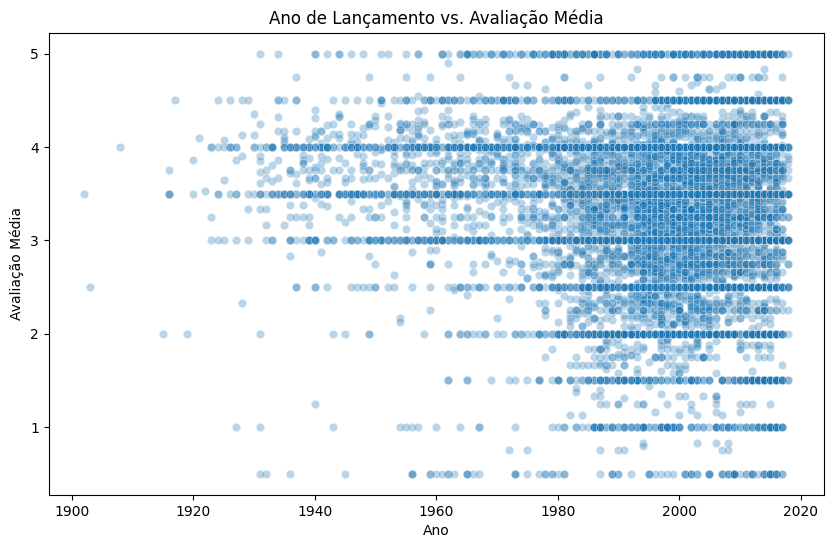

In [ ]:
# (a) Correlação entre ano e avaliação média
correlation = movies_with_ratings["year"].corr(movies_with_ratings["average_rating"])
print(f"(1a) Correlação entre ano e avaliação média: {correlation:.2f}")

plt.figure(figsize=(10,6))
sns.scatterplot(data=movies_with_ratings, x="year", y="average_rating", alpha=0.3)
plt.title("Ano de Lançamento vs. Avaliação Média")
plt.xlabel("Ano")
plt.ylabel("Avaliação Média")
plt.show()



In [ ]:
# (b) Dispersão - avaliadores x rotuladores
ratings_variance = ratings_df.groupby("userId")["rating"].var().mean()
genre_dispersion = movies_exploded["genres_list"].value_counts().var()
print(f"(1b) Dispersão das avaliações: {ratings_variance:.2f}")
print(f"Dispersão das categorias rotuladas: {genre_dispersion:.2f}")

(1b) Dispersão das avaliações: 0.93
Dispersão das categorias rotuladas: 1338338.91


(1c) Categoria mais comum: Drama (4361 filmes)


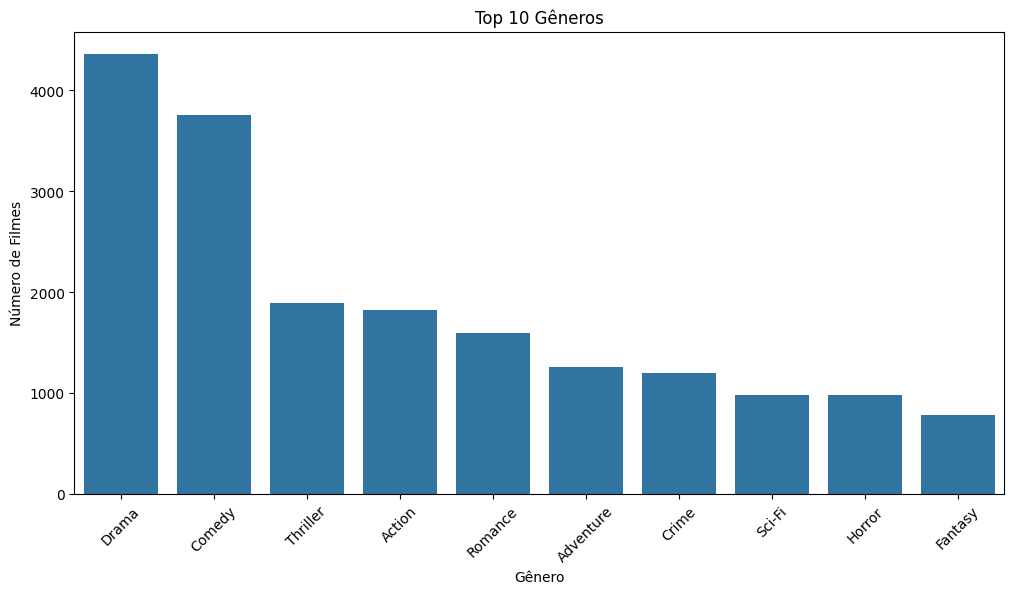

In [ ]:
# (c) Categoria rotulada mais frequente
genre_counts = movies_exploded["genres_list"].value_counts()
print(f"(1c) Categoria mais comum: {genre_counts.idxmax()} ({genre_counts.max()} filmes)")

plt.figure(figsize=(12,6))
sns.barplot(x=genre_counts.index[:10], y=genre_counts.values[:10])
plt.title("Top 10 Gêneros")
plt.xticks(rotation=45)
plt.ylabel("Número de Filmes")
plt.xlabel("Gênero")
plt.show()

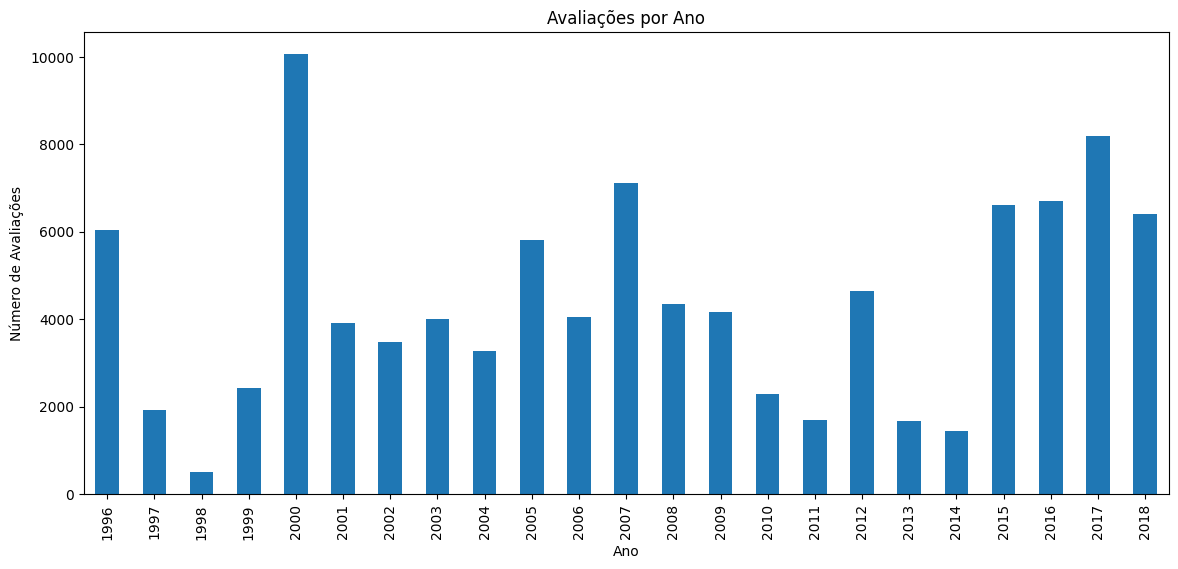

In [ ]:
# (d) Distribuição das avaliações ao longo do tempo
ratings_by_year = ratings_df.groupby("year")["rating"].count()

plt.figure(figsize=(14,6))
ratings_by_year.plot(kind="bar")
plt.title("Avaliações por Ano")
plt.xlabel("Ano")
plt.ylabel("Número de Avaliações")
plt.show()

QUESTÃO 2 - BASE ESCOLHIDA: movies.csv

In [ ]:
# Pergunta 1: Quais são os gêneros mais comuns após 2000?
post_2000_movies = movies_df[movies_df["year"] > 2000]
post_2000_exploded = post_2000_movies.explode("genres_list")
top_genres_post2000 = post_2000_exploded["genres_list"].value_counts().head(5)
print("(2.extra) Gêneros mais comuns após 2000:")
print(top_genres_post2000)


(2.extra) Gêneros mais comuns após 2000:
genres_list
Drama       1970
Comedy      1776
Thriller    1012
Action       974
Romance      683
Name: count, dtype: int64


In [1]:
# Pergunta 2: Quais filmes estão sem gênero?
no_genre_movies = movies_df[movies_df["genres"] == "(no genres listed)"]
print(f"(2.extra) Filmes sem gênero: {len(no_genre_movies)}")

NameError: name 'movies_df' is not defined

QUESTÃO 2

# Pergunta 1 — Base: tags.csv
# Qual é a tag mais frequentemente utilizada pelos usuários ao rotular filmes no dataset?

#Resposta: De acordo com o trecho do código:
top_tags = tags["tag"].value_counts().head(10)
print(top_tags.index[0])

# Pergunta 2 — Base: tags.csv
# Qual usuário aplicou o maior número de tags e quantas tags ele usou?
num_tags_per_user = tags["userId"].value_counts()

top_user = num_tags_per_user.idxmax()
num_tags = num_tags_per_user.max()
print(f"O usuário {top_user} aplicou {num_tags} tags.")

#  Pergunta 1 — Base: links.csv
# Como o dataset links.csv pode ser útil em análises externas e o que ele traz de informação complementar?
#Resposta: O links.csv faz a ponte entre o ID interno dos filmes no MovieLens (movieId) e seus equivalentes nos bancos de dados do IMDb (imdbId) e do TMDB (tmdbId),

# Pergunta 2 — Base: links.csv
# Todos os filmes presentes na base movies.csv possuem correspondência nos bancos externos (IMDb e TMDB)?
merged = movies.merge(links, on="movieId", how="left")
missing_links = merged[merged["imdbId"].isna() | merged["tmdbId"].isna()]
print(f"Número de filmes sem link externo: {len(missing_links)}")

#Perguntas tabela Ratings
#Pergunta 1:
#Qual é a distribuição geral das avaliações? Há alguma nota que os usuários tendem a dar mais frequentemente?

#Resposta:
# Distribuição geral das avaliações
plt.figure(figsize=(8, 4))
sns.countplot(x="rating", data=ratings, palette="magma")
plt.title("Distribuição Geral das Avaliações")
plt.xlabel("Nota")
plt.ylabel("Frequência")
plt.show()

# Resposta:
# A partir do gráfico, podemos observar quais notas são mais frequentes.
# É comum que notas como 4.0 e 3.5 sejam mais dadas, indicando uma tendência positiva nas avaliações.


#Pergunta 2:
#Qual usuário deu mais avaliações no total? E quantas ele deu?

#Resposta:
# Usuário com maior número de avaliações
most_active_user = ratings["userId"].value_counts().idxmax()
most_ratings = ratings["userId"].value_counts().max()
print(f"O usuário mais ativo foi o ID {most_active_user}, com {most_ratings} avaliações feitas.")

# Também podemos visualizar os top 10 usuários mais ativos
top_users = ratings["userId"].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_users.index.astype(str), y=top_users.values, palette="crest")
plt.xlabel("ID do Usuário")
plt.ylabel("Quantidade de Avaliações")
plt.title("Top 10 Usuários com Mais Avaliações")
plt.show()









